# Image segmentation using traditonal machine learning

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Get an example image and its labeled counterpart (ground truth)

Text(0.5, 1.0, 'Labeled Image')

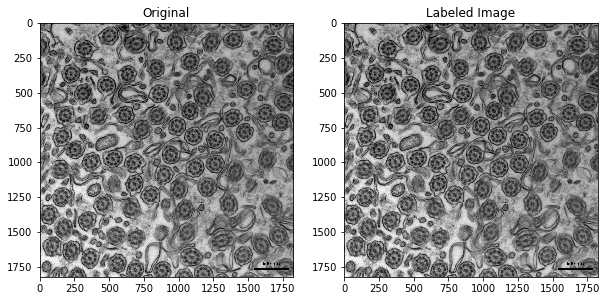

In [5]:
# import the images, both original and ground truth.
img = cv2.imread('images/cilia.jpg')
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
labeled_img = cv2.imread('images/cilia_labeled.jpg')

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Original')

fig.add_subplot(1,2,2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Labeled Image')

### Step 2: Create feature bank

In [4]:
#Create the DataFrame and fill it with mutiple filters features

df = pd.DataFrame()
img_col = img_grayscale.reshape(-1)

#ORIGINAL PIXELS
df['Original_pixels'] = img_col

#GABOR FEATURES
#parameters (allow to generate a large set of features)

ksize = 5 #depends on the feature size you want to enhance | Hardcoded here.
phi = 0 #offset | Hardcoded here

gabor_index = 0
gabor_kernels = []

for theta in range(2):
    theta = theta /4. * np.pi
    for sigma in (3,5):
        for lambd in np.arange(0, np.pi, np.pi /4.):
            for gamma in (0.05, 0.5):
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)
                gabor_kernels.append(kernel)
                filtered_img = cv2.filter2D(img_grayscale, cv2.CV_8UC3, kernel)
                filtered_img_col = filtered_img.reshape(-1)
                df[f'Gabor_{gabor_index}'] = filtered_img_col
                gabor_index += 1
                
#CANNY FEATURES (edge detector)

canny_min = np.arange(50,200,20)
canny_max = np.arange(50,200,20)

for min in canny_min:
    for max in canny_max:
        img_edges = cv2.Canny(img_grayscale, min, max)
        img_edges_col = img_edges.reshape(-1)
        df[f'Canny_{min}_{max}'] = img_edges_col

#ROBERTS, SOBEL, SCHARR, PREWITT FEATURES

from skimage.filters import roberts, sobel, scharr, prewitt

img_roberts = roberts(img_grayscale)
df['Roberts'] = img_roberts.reshape(-1)

img_sobel = sobel(img_grayscale)
df['Sobel'] = img_sobel.reshape(-1)

img_scharr = scharr(img_grayscale)
df['Scharr'] = img_scharr.reshape(-1)

img_prewitt = prewitt(img_grayscale)
df['Prewitt'] = img_prewitt.reshape(-1)

#GAUSSIAN

from scipy import ndimage as nd

for gauss_sigma in np.arange(1,20,2):
    gaussian_img = nd.gaussian_filter(img_grayscale, gauss_sigma)
    df[f'Gaussian_{gauss_sigma}'] = gaussian_img.reshape(-1)
    
#VARIANCE (SLOW !)

#for variance_size in np.arange(1,5,1):
#    variance_img = nd.generic_filter(img_grayscale, np.var, size=variance_size)
#    df[f'Variance_{variance_size}'] = variance_img.reshape(-1)
    
    
#MEDIAN

for median_size in np.arange(1,10,2):
    median_img = nd.median_filter(img_grayscale, size=median_size)
    df[f'Median_{median_size}'] = median_img.reshape(-1)
        
#Print the feature stack to see how it looks like                
df.head(20)

,Original_pixels,Gabor_0,Gabor_1,Gabor_2,Gabor_3,Gabor_4,Gabor_5,Gabor_6,Gabor_7,Gabor_8,...,Median_1,Median_3,Median_5,Median_7,Median_9,Median_11,Median_13,Median_15,Median_17,Median_19
0,134,0,0,0,0,0,0,179,175,0,...,134,122,125,133,131,132,132,132,132,131
1,122,0,0,0,0,0,0,160,155,0,...,122,133,133,132,133,132,132,132,132,131
2,133,0,0,0,0,0,0,181,176,0,...,133,129,133,133,133,133,133,132,132,131
3,129,0,0,0,0,0,0,165,160,0,...,129,134,134,134,134,133,133,133,132,131
4,147,0,0,0,0,0,0,142,139,0,...,147,144,142,139,139,134,133,133,132,131
5,146,0,0,0,0,0,0,202,196,0,...,146,144,143,140,140,138,134,133,133,131
6,143,0,0,0,0,0,0,155,151,0,...,143,143,142,142,140,139,135,133,133,131
7,132,0,0,0,0,0,0,178,173,0,...,132,140,143,142,140,140,138,134,133,132
8,140,0,0,0,0,0,0,181,176,0,...,140,140,140,141,143,141,139,135,133,132
9,144,0,0,0,0,0,0,171,167,0,...,144,140,140,141,143,142,139,136,134,132


### Step 3: Create the model and validate it

### Step 4: Find which features are relevant

### Step 5: Save the model as pickle

### Step 6: Use the model for segmentation